# PSET 6: <br> The Ammonia Maser, <br> and the Esaki/Tunnel Diode!


In this iPython notebok you will get to explore two Nobel Prize winning phenomena!

Before you start, you may want to read up on the wikipedia articles on these two nobel prizes, to get you drooling!

* The Ammonia Maser (Townes, Nikolay Basov and Alexander Prokhorov Nobel Prize in Physics '64): [wiki link](https://en.wikipedia.org/wiki/Maser), [QM of the maser](http://feynmanlectures.caltech.edu/III_09.html)
* Esaki/Tunnel Diode (Leo Esaki, Nobel Prize in physics '73): [wiki](https://en.wikipedia.org/wiki/Tunnel_diode), [Electronics tutorial](http://www.radio-electronics.com/info/data/semicond/tunneldiode/tunneldiode.php)

#### <i class="fa fa-medkit"></i> Help!
Remember you have the **help** function to ask for information on how a function is used:
```python
help(function)
```
#### <i class="fa fa-diamond"></i> Fancy plotting

The quantumWorld module also includes a function to make prettier plots via **fancy_plotting()**, with an optional argument **grid=False** which draws grids on the plot if desired.

### Instantaneous feedback :
We hope that by now you've had enough friendly exposure to iPython Notebook programming that you will be able to tackle this. Also, we've left as part of the notebook most of the figures that you should get as output if you write your code correctly, as a way to give instantaneous feedback to your code.


In [15]:
#Here is what we usually import
% matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simps
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg
import scipy.integrate as integrate
from matplotlib import animation
##this let's us print out the available functions in our library,
## as well as the documentation
import pydoc 
# add all probables spots for the quantum world library
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld
qworld.fancy_plotting()

# <i class="fa fa-check-circle-o"></i> Exercise 1: <br>  Ammonia Maser
## 1 point

![](files/ammonia_mazer.jpg)

First prototype ammonia maser and inventor Charles H. Townes. This was before HD photographs. 

## 1.a - Ammonia PES model

The potential energy surface (*PES*) of the Ammonia molecule can be modeled by: 

$$V(x) = \frac{1}{2}k(x-x_0)^2 + be^{-c(x-x_0)^2}$$

Write a function called ammonia_maser that takes as input an x position array as well as the parameters k, x0, b, and c, and returns the ammonia molecule potential, Vx

In [16]:
###################################
def ammonia_maser(x, k, x0, b, c):

    return Vx
###########################################

### Parameters for the ammonia potential. 

Use them to:

1.  Generate the potential **vx** over the range of **x** values that we give you.
2.  Create a H matrix using the finite differences code in the library (**build_H_matrix**). **make sure you use m_ammonia for the mass!!!!** 
3.  Get the eigenvalues and eigenvectors of the matrix. 

In [17]:
k=0.07598
x0=5
b=0.05684
c=1.3696

m_ammonia = 4668 # atomic units

x = np.arange(0,10,0.01)

##################################################
#In three lines, generate potential Vx, build H matrix, and get 
#its eigenvectors and eigenvalues



######################################################


## 1.b- <i class="fa fa-line-chart"></i> Plot the PES and it's eigenfunctions

Now make a plot that overlays the potential $V(x)$ and the the first four eigenstates. (i.e. your plot should have a total of 5 lines, $V(x)$ and the first four lowest energy eigenstates.)

For clear visualization I recommend scaling the eigenstates as follows:  

$$scale_1*\psi_i + scale_2 * i \text{ where }scale_1 = 0.15\text{ and }scale_2 = 0.05$$

You might have to fine tune your x and y limits in plotting. Make sure to label your plot and add a legend.

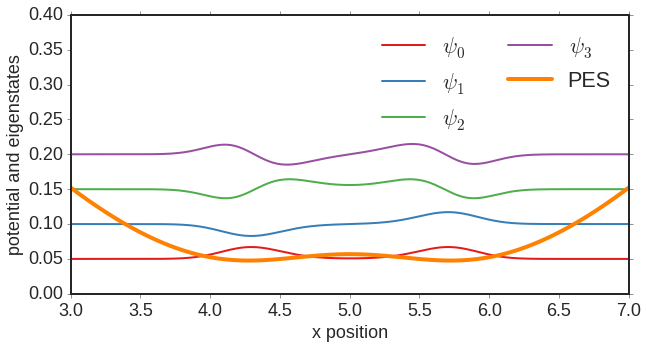

## 1.c - <i class="fa fa-question-circle"></i> Compare with experiment

In order to convert the energy difference of the first two states to GHz, you will need a conversion factor, which is given to you below.  If you multiply your energy difference (in Hartrees) by that factor, you will get the energy difference in GHz. 

In [19]:
Hartree_to_GigaHertz = 6579000.68392

#######################################################
#In two or three lines, get the difference in energies of the first two eigenstates
#and convert it to Gigahertz before printing it out.

###################################################33

29.3451284913


### <i class="fa fa-question-circle"></i> Questions <br> Does it match the experimental Maser frequency of 24 GHz?<br>How does the double well of the PES relate to the maser? <br> What could be improved of this model to better match experiment?

Discuss here

# <i class="fa fa-check-circle-o"></i> Exercise 2: <br>  Quantum Tunneling
## 2 points
Our goal will be to calcualte the transition probability of a wavepacket through a potential barrier as a function of particle energy and mass.

Throughout this section, we'll refer to the following diagram, where an incoming free particle (from the right) interacts with a potential barrier.  A portion of the wave is reflected, and another portion is transmitted. 
![Potential Barrier](files/BarrierDiagram.png)

For this section, we'll follow Schrier's Text book, Chapter 3, in our approach to simulate tunneling of a wavefunction through a potential barrier. To solve the tunneling problem with the finite differences approach we'll start out by rewriting the time-independent Schrodinger Equation: <br><br>
$$\hat{H}\psi = E\psi$$<br>
$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi$$<br>
$$\frac{d^2\psi}{dx^2} + \frac{2m}{\hbar^2}[E - V(x)]\;\psi=0$$
<br>

Following the notation we used previously in the context of Finite Differences, $\psi_j$ will refer to the value of the wavefunction at the point $x_j$, that is $\psi(x_j)$.  Using the same expression for central-differences second derivative, we'll obtain: <br> 

$$\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta x^2} + \frac{2m}{\hbar^2}\;[E - V_j]\psi_j = 0 $$

<br>
Finally, we can rearrange this equation to write an expression for $\psi_{j+1}$ in terms of $\psi_j$ and $\psi_{j-1}$:<br>
$$\psi_{j+1} = (2 + \frac{2m}{\hbar^2}[V_j-E]\;a^2)\psi_j - \psi_{j-1}$$
<br>

This equation tells us that if we specify the values of $\psi_0$ and $\psi_1$, we can iteratively solve for the value of $\psi$ at all other points of our grid. 



To the left of the barrier, at $x=0$, the wave is equal to $\psi(x=0)=c_2e^{-ik0} = c_2$, If we assume a unit amplitude of the transmitted wave, then $\psi(x=0)=c_2 = 1$.

At the next point in the grid, where $x= \Delta x$, we'll have $\psi(x=1)=c_2e^{-ika}$.  And those two points are enough to get our iterative scheme explained above going!

## 2.a - Barrier function

We'll write a cell of code for you that creates a potential barrier of a give **width**, height (**V0**), and center position (**x0**):

In [20]:
#Set the potential barrier:
def V_barrier(x_array, width = 1, V0=9, x0 = 4):
    Vx = np.zeros_like(x_array)
    for i in range(len(x_array)): 
        if  x_array[i]<x0:
            Vx[i] = 0
        elif x_array[i] < x0+width:
            Vx[i] = V0
        else:
            Vx[i] = 0
    return Vx
            

### <i class="fa fa-line-chart"></i> Plot!
Create a grid of x-coordinates called x, from $0$ to $10$ in intervals of $0.01$.

Then plot the potential $V(x)$ in that range of $x$ values. 

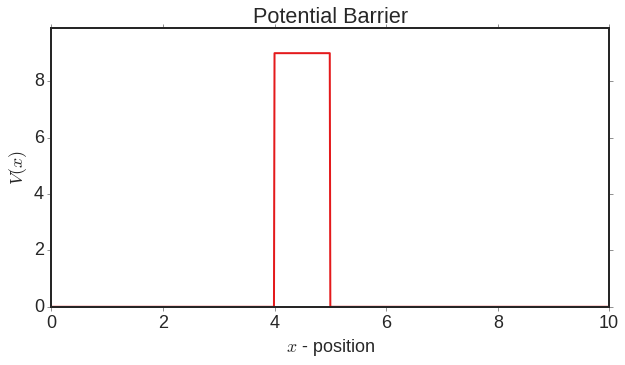

## 2.b - Barrier function

### Initialize your variables

Next, we'll build our wave function iteratively using the technique described above.

To do that, you will first need to create a complex number array of zeros, called psi, of the same length as x.

And we'll assign the values of $\psi[0]$ and $\psi[1]$ ourselves. 

In [22]:
#atomic units
hbar = 1
m = 1
#energy and wavenumber
energy = 9
k = np.sqrt(2*m*energy/hbar**2)

#wavefunction array , zeros

####################################################################################
#Two lines Assign values of wave function: psi[0] and psi[1]


#################################################################################

### FIll the values for all the grid

Next, write a for loop that goes from $i=1$ to $i = len(xcoords)-1$.
And for each value of $i$, get the value of $\psi[i+1]$ using the finite differences approach outlined above. After running the for loop, plot the real part,imaginary part and pdf of $\psi(x)$ as a function of coordinates. 

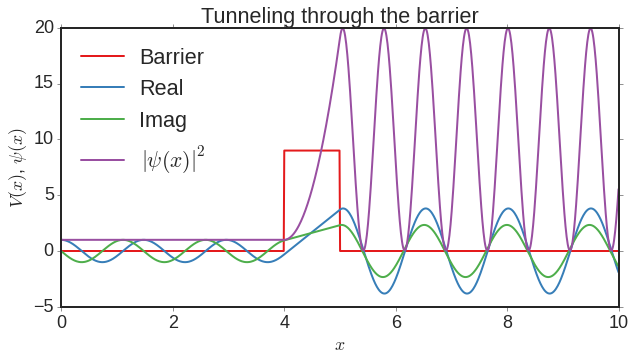

In [23]:
#iterate to get all values of psi
for i in range(1, len(x)-1):   
    ####################################################################
    #One line, assign the value of psi[i+1] using the 
    #finite differences relation outlined above. 

    ##mass = 1 in this case. 
    ####################################################################



## 2.c - <i class="fa fa-question-circle"></i> Questions <br> Can the wavefunction continue past the barrier? Why? <br> How probable is finding the wave on each side?


Answer here

## 2d - Computing the transmission probability

The transmission probability is the ratio between the "amount" of wavefunction that made it through the barrier to the "amount" of wavefunction that was sent in. 

We use probability densities for "amounts": $$t = \|\frac{c_2}{c_0}\|^2 $$ 

**Following Schrier, section 3.1.3, one can derive the following relation: ** 

$$ t = \frac{2}{1 + P_{avg}} ,\quad \text{where } P_{avg} $$

$P_{avg}$ can be obtained by taking the average of the minimum and maximum values of the oscillations of the PDF associated to the wave packet sufficiently far away to the right of the barrier. 

### Code the transmission_probability function
that takes as input the **pdf** associated to a wavefunction and returns the transmission probability.

**Tip :** We want to take the max for points sufficiently far way from the barrier, this might require restrciting your range og your pdf.
 You might want to use python's [*slicing notation*](http://stackoverflow.com/questions/509211/explain-pythons-slice-notation) for arrays..in particular you get use **a[:end]** if you want the first elements until **end-1**, for a more complete overview:
```python
a[start:end] # items start through end-1
a[start:]    # items start through the rest of the array
a[:end]      # items from the beginning through end-1
a[:]         # a copy of the whole array
a[start:end:step] # start through not past end, by step
```

In [24]:
def transmission_probability(pdf):

    
    return transmission

### Code the  transmission_through_barrier function


This function should take as input the **x** array and a set of parameters (mass of particle **m**, **energy**, barrier **width**), and returns the transmission probability. 

A guideline of what to do:

* Get potential on the grid x
* Initialize a wavefunction  
* Fill $\psi$ with the relevant values.
* Get the pdf of $\psi$
* Calculate the transmission_probability


In [25]:
def transmission_through_barrier(x, m = 1, energy = 9, width = 1):
    

        
    return transmission

## 2e - Transmission probability for multiple energies

 Run the function above for a range of energy values that goes from $E=0$ to $E=25$ in steps of 0.1.
 Store the value of the transmission probabilities in an array.  

In [26]:
#grid and constants
dx = 0.01
XEND = 10
NPTS = XEND/dx
x = np.arange(0, XEND, dx)
m=1


###  <i class="fa fa-line-chart"></i>  Plot transmission as a function of energy

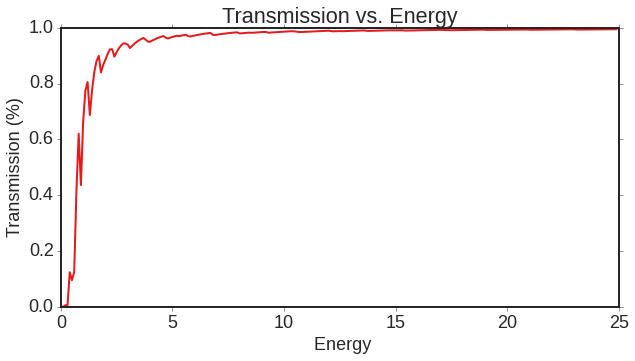

The hump in the curve around $E=7$ is a quantum phenomenom that forms the basis for the Esaki or tunnel diodes , for which got Leo Esaki a Nobel Prize in physics!!!!

### <i class="fa fa-flask"></i>  Transmission as a function of mass
Repeat the same analysis you did above, but this time plot the transmission probability as funciton of the mass of the particle.  vary the mass from 0.5 to 5 in steps of 0.1. You will have to fix the value of energy.

###  <i class="fa fa-line-chart"></i>  Plot transmission as a function of mass

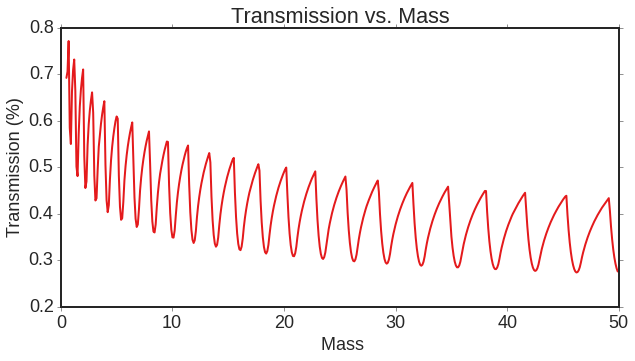

## 2.f - <i class="fa fa-question-circle"></i> Questions <br> What trends do you see for mass and energy? <br> How prevalent is tunneling for this model? <br> Is there tunneling present in the ammonia maser? (Why?) <br> How is tunneling used in everyday consumer products?

Answer here

# <i class="fa fa-check-circle-o"></i> Exercise 3: <br> Tunneling in action!
## ( The little wavepacket that could )

For this problem we will look at a travelling localized wave. This involves solving the steaty state problem, propagating the solution many times.
In demo 10 we saw the Crank-Nicholson scheme which can solve a system of equations as:

$$ (1 + \frac{1}{2}i H dt) \psi(t + dt) = (1 + \frac{1}{2}i H dt)^\dagger \psi(t ).$$
$$ A \psi(t + dt) = A^\dagger \psi(t ).$$

Where $A$ can be thought of as the average of the forward propagator applied at time $t$ and the reverse propagator applied at time $t + dt.$

Then, this scheme basically works to ensure that quantum mechanics maintains its time-reversal symmetry at all times. This is precisely the bit that makes the Crank-Nicholson propagator very robust.

We will be solving these with **sparse** linear algebra routines, if we know our matrices and arrays will have many zeros (sparcity) than we can run faster linear algebra functions. Don't worry, this is all under the hood of the quantum world module.

Sounds good? Know that we know how to get our molecules moving we will:

1. Prepare intial conditions.
2. Setup operator A and the wavepacket.
3. Time-propogate your solution.
4. Animate the propogation.

### Physical conditions

In [30]:
m = 938.27        # mass of proton MeV/c
hbar = 0.1973        # hbar-c in eV⋅μm
c = 3.0e2         # speed of light

# grid parameters
dx = 0.01 
L = 1.2
x = np.arange(-L, L, dx)

### Time conditions

In [31]:
time_steps = 10000 # Number of time steps
dt=1.0/float(time_steps)
time = np.arange(0.0,1.0,dt)

## Delta function as a barrier

We are not using $\delta(0)=\infty$ since numerically this will present problems with the infinity, but we will just set it as a high value.

In [32]:
def V_delta(x):
    Vx = np.zeros_like(x)
    Vx[len(x)/2] = 9
    return Vx

In [33]:
def gauss_packet(x, alpha=0.030, k=1.0, x0 = -0.100):
    '''
    Initial state for a travelling gaussian wave packet.
    '''
    prefactor = (1.0/(2.0*np.pi*alpha**2))**0.25
    K1 = np.exp(-1.0*(x-x0)**2/(4.*alpha**2))
    K2 = np.exp(1j*k*x)
    return prefactor*K1*K2

## 3.a - Wavepacket and $A$ operator

Define them below. Remember that 
$$A = (1 + \frac{1}{2}i H dt) = I - \frac{dt}{2}(D2+V) \quad \text{and} \quad A^\dagger = I + \frac{dt}{2}(D2+V)$$.

You have **sparse_T** and **sparse_V** in the quantumworld module to build D2 and V respectively. Hint: Use help. Our returned matrices will already have the imaginary prefactor integrated.

We will define the initial wavepacket for you, you can play around with the value later.

In [34]:
psi0 = gauss_packet(x, x0=-0.5, k = -200.0)


### <i class="fa fa-line-chart"></i> Plot them superimposed

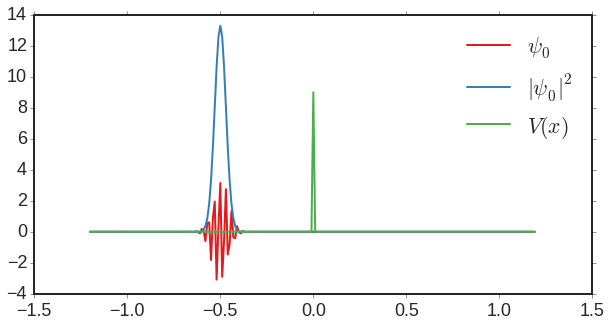

## 3.b -Time-propagation

Remeber you should create an empty array for your psi at different times, apply the operator and normalize your wavefunction.

You can call **forwardcn** from the quantum world module to use Crank-Nicholson propagator.


### <i class="fa fa-line-chart"></i> Plot several snapshots
This is to check if your propagation is working.

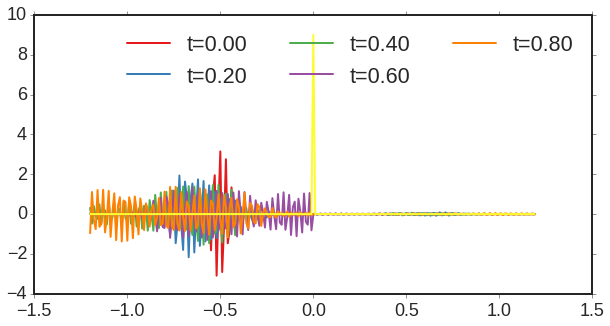

## 3.c - <i class="fa fa-video-camera"></i> Animate
Plot the wavefunction along with it's absolute value $|\psi|$. (we are using this instead of the pdf, since the range of plotting values is quiet large and it is hard to see the smaller values).


In [38]:
NFRAMES=200
TIMESKIP=len(time)/float(NFRAMES)

#We'll set up the figure for you
fig = plt.figure()
plt.xlim(np.min(x),np.max(x))
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('$\psi$,$|\psi|$')
plt.plot(x,vx)

line, = plt.plot([], [], lw=4,label='$|\psi|$') #line is a plot.... 
line1, = plt.plot([], [], lw=2,alpha=0.9,label='$\psi$') #line is a plot.... 
plt.legend(loc='best')

def init():
    line.set_data([], []) #sets the line data to nothing
    line1.set_data([], []) #sets the line data to nothing

    return line,  #return the line object


def animate(t): 


    return

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=NFRAMES)
#save the animation
qworld.embedAnimation(anim,plt)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## 3.d - <i class="fa fa-flask"></i> Define another barrier potential $V(x)$ and repeat

## 3.e - <i class="fa fa-question-circle"></i> Questions/Discussion

###    What was the wavepacket representing in this exercise?

### How do the parameters for the wavepacket affect the tunneling with the delta spike potential?

### How do the parameters in your potential affect the behaviour of the wavepacket?


Answer here

# <i class="fa fa-check-circle-o"></i> Exercise 4: <i class="fa fa-book"></i> Article review
## <i class="fa fa-exclamation-triangle"></i> Grad students, required, 1 points
## <i class="fa fa-smile-o"></i> Undergrad students, not required, 1 bonus point

![](files/PRL_article.png)

[**Sensitive Chiral Analysis via Microwave Three-Wave Mixing**](http://www.nature.com/nnano/journal/v7/n5/full/nnano.2012.34.html) by David Patterson and John M. Doyle., 2013, PHYSICAL REVIEW LETTERS, [doi:10.1103/PhysRevLett.111.023008](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.111.023008).

You can find the article inside of the folder "files". Their earlier work was published in [Nature 497, 475 (2013)](http://www.nature.com/nature/journal/v497/n7450/full/nature12150.html?WT.ec_id=NATURE-20130523), which is noted as a reference but not required for reading.


## 4.a - <i class="fa fa-pencil"></i> One sentence summary of the goal of the paper


Fill me


## 4.b - <i class="fa fa-pencil"></i> Summary of the key experimental techniques

Fill me

## 4.c - <i class="fa fa-pencil"></i>  What	is	the	key	contribution	and	why	is	it	relevant	?	
(**Hint:**	what	would happen	if	this	paper	did	not	get	published?)

Fill me